<a href="https://colab.research.google.com/github/herculesprof/DIO_Treinamento_de_Redes_Neurais_com_Transfer_Learning/blob/main/DIO_Treinamento_de_Redes_Neurais_com_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.H0OA02_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Iniciando treinamento...
Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 924ms/step - accuracy: 0.5854 - loss: 1.0722 - val_accuracy: 0.8760 - val_loss: 0.3923
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 74s 795ms/step - accuracy: 0.8837 - loss: 0.3463 - val_accuracy: 0.8910 - val_loss: 0.3221
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 777ms/step - accuracy: 0.9065 - loss: 0.2724 - val_accuracy: 0.9046 - val_loss: 0.2844
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 863ms/step - accuracy: 0.9343 - loss: 0.2086 - val_accuracy: 0.9019 - val_loss: 0.2736
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 836ms/step - accuracy: 0.9485 - loss: 0.1831 - val_accuracy: 0.9046 - val_loss: 0.2699


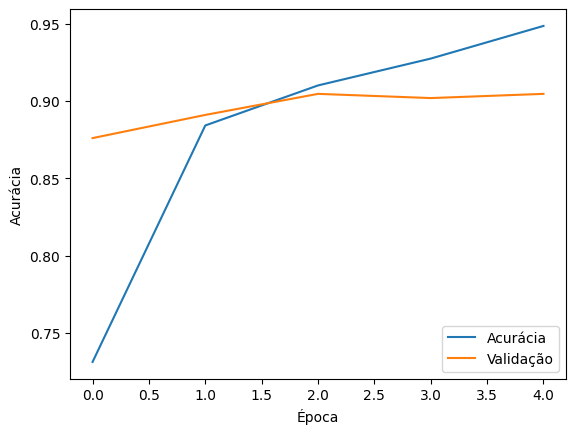

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

# 1. Carregando o Dataset incorporado (tf_flowers)
(train_ds, val_ds), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# 2. Pré-processamento: Redimensionar e Normalizar
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1  # Normaliza entre -1 e 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train_batches = train_ds.map(format_example).shuffle(1000).batch(32)
val_batches = val_ds.map(format_example).batch(32)

# 3. Transfer Learning com MobileNetV2
# Criamos o modelo base com pesos da ImageNet, sem a camada de classificação final
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Congelamos o modelo base para não treinar seus pesos novamente
base_model.trainable = False

# 4. Construção do Modelo Final
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(5, activation='softmax') # 5 classes de flores
])

# 5. Compilação e Treino
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Iniciando treinamento...")
history = model.fit(train_batches, epochs=5, validation_data=val_batches)

# 6. Visualização simples
plt.plot(history.history['accuracy'], label='Acurácia')
plt.plot(history.history['val_accuracy'], label = 'Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()